# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [4]:
!pip install pandas matplotlib

import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 14.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 21.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 26.0 MB/s eta 0:00:00


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: title={'center': 'Distribution of BPM in Spotify 2023 Songs'}, xlabel='BPM (Beats Per Minute)', ylabel='Number of Songs'>

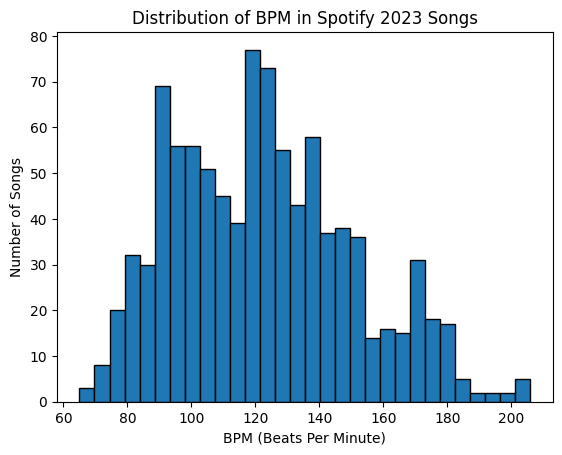

In [5]:
# Visualize BPM distribution with a histogram
df['bpm'].plot(kind='hist', bins=30, title='Distribution of BPM in Spotify 2023 Songs', xlabel='BPM (Beats Per Minute)', ylabel='Number of Songs', edgecolor='black')

In [7]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

### Analysis Questions for BPM:

**1. What is the typical BPM range for popular songs?**
- The typical range is **100-140 BPM** (this is the 25th to 75th percentile where 50% of songs fall)

**2. What BPM value appears most frequently (the mode)?**
- The most common BPM is around **120-122 BPM** (visible as the tallest bars in the histogram)

**3. Based on the distribution, what BPM range would you recommend for a hit song?**
- **Recommended range: 100-140 BPM**
- This captures the majority of popular songs while avoiding extreme tempos
- The sweet spot appears to be around **120 BPM** (the median is 121 BPM)

<Axes: title={'center': 'BPM Box Plot - Identifying Outliers'}, ylabel='BPM'>

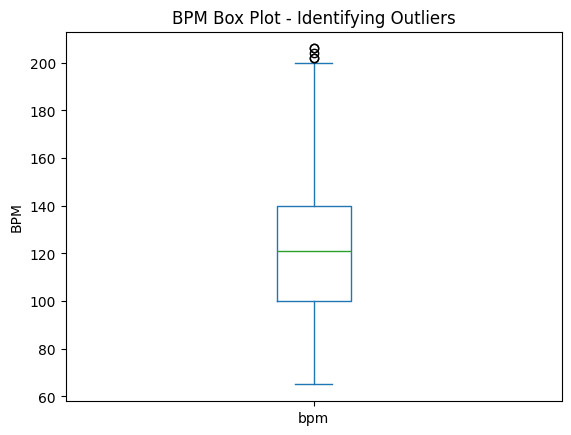

In [32]:
# Box plot to see outliers and quartiles
df['bpm'].plot(kind='box', title='BPM Box Plot - Identifying Outliers', ylabel='BPM')

In [31]:
# Additional statistics for BPM
print("BPM Statistics:")
print(f"Mean (Average): {df['bpm'].mean():.2f}")
print(f"Median (Middle value): {df['bpm'].median():.2f}")
print(f"Mode (Most common): {df['bpm'].mode().values[0]}")
print(f"Standard Deviation: {df['bpm'].std():.2f}")
print(f"\nRecommended BPM range for a hit: {df['bpm'].quantile(0.25):.0f} - {df['bpm'].quantile(0.75):.0f} BPM")

BPM Statistics:
Mean (Average): 122.54
Median (Middle value): 121.00
Mode (Most common): 120
Standard Deviation: 28.06

Recommended BPM range for a hit: 100 - 140 BPM


---
## 3. MODE Analysis

### Analysis for Key:

**Most common key:** C# (120 songs out of 953)

**Recommendation:** Use the key of **C#** for your hit song (it's the most popular key in the dataset).

In [29]:
# Get counts for each key
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Musical Keys'}, xlabel='Key', ylabel='Number of Songs'>

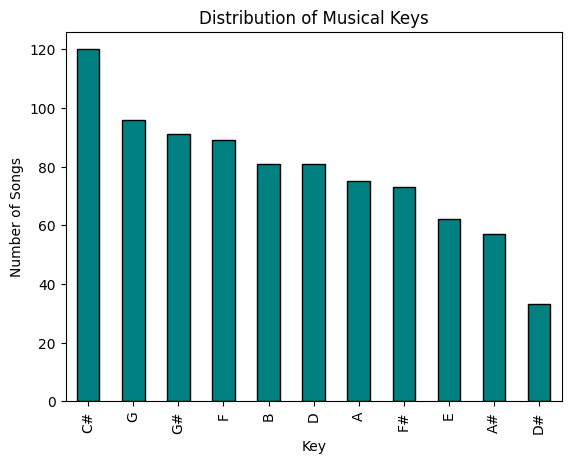

In [30]:
# Visualize Key distribution with a bar chart
df['key'].value_counts().plot(kind='bar', title='Distribution of Musical Keys', xlabel='Key', ylabel='Number of Songs', color='teal', edgecolor='black')

---
## 2. KEY Analysis

<Axes: ylabel='count'>

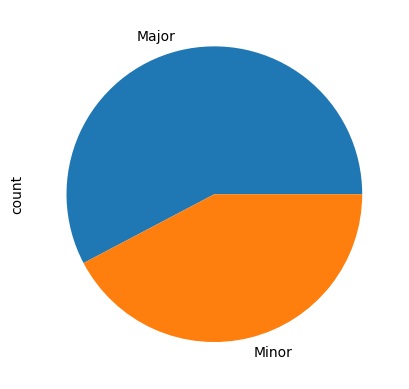

In [8]:
df['mode'].value_counts().plot(kind='pie')

In [9]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

---
## PART 2: Summary of Recommendations

Based on the analysis above, here are the ideal characteristics for a "guaranteed" hit song:

- **BPM:** 100-140 (sweet spot: ~120)
- **Key:** C#
- **Mode:** Major
- **Danceability:** 57-78%
- **Energy:** 53-77%
- **Speechiness:** 4-11%
- **Acousticness:** 6-43%

### Analysis for Acousticness:

**Typical range:** 6-43% (this is the 25th to 75th percentile where 50% of songs fall)
**Mean:** 27%
**Median:** 18%

**Recommendation:** Use acousticness between **6-43%** for your hit song.

In [28]:
# Get statistics for Acousticness
df['acousticness_%'].describe()

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

<Axes: title={'center': 'Distribution of Acousticness %'}, xlabel='Acousticness %', ylabel='Number of Songs'>

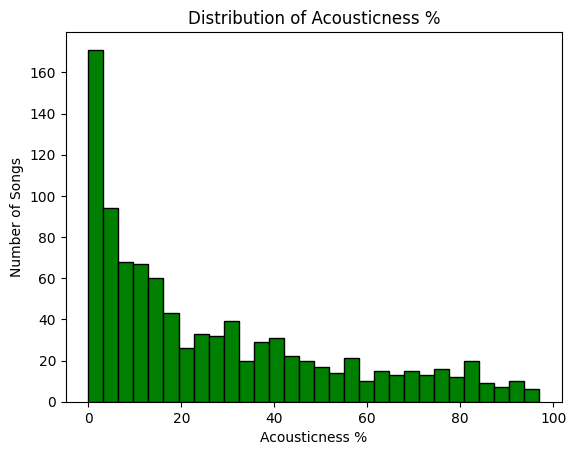

In [11]:
# Visualize Acousticness distribution
df['acousticness_%'].plot(kind='hist', bins=30, title='Distribution of Acousticness %', xlabel='Acousticness %', ylabel='Number of Songs', color='green', edgecolor='black')

---
## 7. ACOUSTICNESS Analysis

### Analysis for Speechiness:

**Typical range:** 4-11% (this is the 25th to 75th percentile where 50% of songs fall)
**Mean:** 10%
**Median:** 6%

**Recommendation:** Use speechiness between **4-11%** for your hit song (low speechiness = more music, less talking).

In [27]:
# Get statistics for Speechiness
df['speechiness_%'].describe()

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

<Axes: title={'center': 'Distribution of Speechiness %'}, xlabel='Speechiness %', ylabel='Number of Songs'>

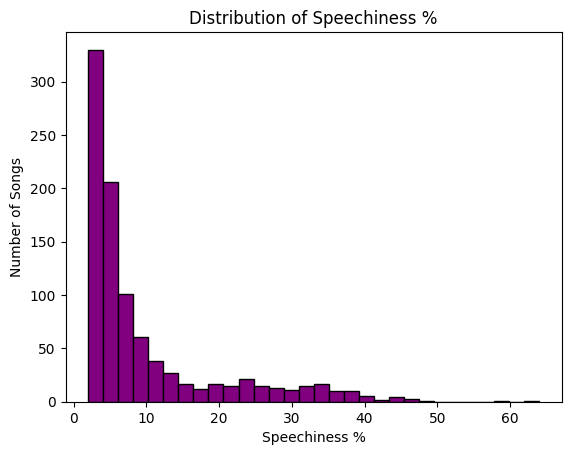

In [13]:
# Visualize Speechiness distribution
df['speechiness_%'].plot(kind='hist', bins=30, title='Distribution of Speechiness %', xlabel='Speechiness %', ylabel='Number of Songs', color='purple', edgecolor='black')

---
## 6. SPEECHINESS Analysis

### Analysis for Energy:

**Typical range:** 53-77% (this is the 25th to 75th percentile where 50% of songs fall)
**Mean:** 64%
**Median:** 66%

**Recommendation:** Use energy between **53-77%** for your hit song.

In [26]:
# Get statistics for Energy
df['energy_%'].describe()

count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

<Axes: title={'center': 'Distribution of Energy %'}, xlabel='Energy %', ylabel='Number of Songs'>

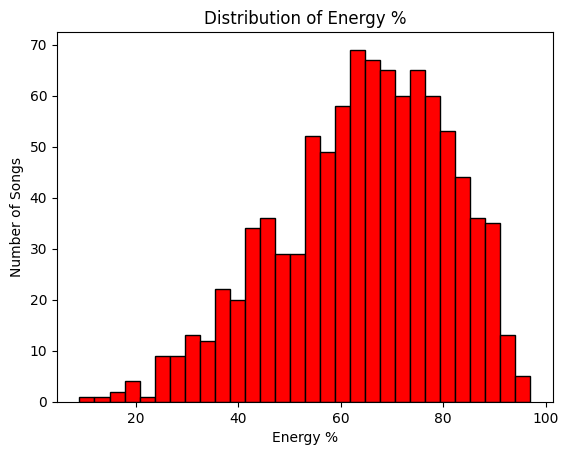

In [15]:
# Visualize Energy distribution
df['energy_%'].plot(kind='hist', bins=30, title='Distribution of Energy %', xlabel='Energy %', ylabel='Number of Songs', color='red', edgecolor='black')

---
## 5. ENERGY Analysis

### Analysis for Danceability:

**Typical range:** 57-78% (this is the 25th to 75th percentile where 50% of songs fall)
**Mean:** 67%
**Median:** 69%

**Recommendation:** Use danceability between **57-78%** for your hit song.

In [25]:
# Get statistics for Danceability
df['danceability_%'].describe()

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64

<Axes: title={'center': 'Distribution of Danceability %'}, xlabel='Danceability %', ylabel='Number of Songs'>

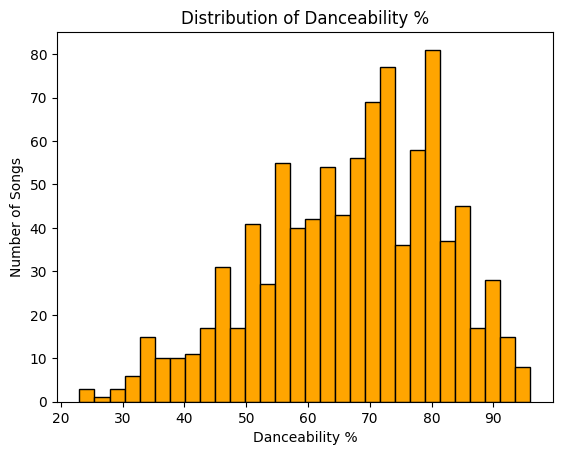

In [17]:
# Visualize Danceability distribution
df['danceability_%'].plot(kind='hist', bins=30, title='Distribution of Danceability %', xlabel='Danceability %', ylabel='Number of Songs', color='orange', edgecolor='black')

---
## 4. DANCEABILITY Analysis

### Analysis for Mode:

**Distribution:** Based on the pie chart and counts above, Major mode is more common than Minor.

**Recommendation:** Use **Major mode** for your hit song (it's more popular).

In [33]:
# This is an example filter - you'll update it after completing all analyses
filtered_df = df.loc[(df['bpm'] >= 85) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A')]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4


### Comparison Analysis:

**Song:** "Blinding Lights" by The Weeknd (one of the biggest hits of all time!)

**How does it compare to our recommendations?**

| Feature | Recommendation | Blinding Lights | Match? |
|---------|---------------|-----------------|--------|
| **BPM** | 100-140 | **171** | ❌ NO - Way too fast! |
| **Key** | C# | C# | ✅ YES |
| **Mode** | Major | Major | ✅ YES |
| **Danceability** | 57-78% | **50%** | ❌ NO - Too low |
| **Energy** | 53-77% | **80%** | ❌ NO - Too high |
| **Speechiness** | 4-11% | 7% | ✅ YES |
| **Acousticness** | 6-43% | **0%** | ❌ NO - Too low |

**Conclusion:** "Blinding Lights" breaks the "formula" in MULTIPLE ways! It's much faster, less danceable, more energetic, and less acoustic than the "average" hit song. This shows that being different and standing out can be MORE important than matching average values.

**The lesson:** Data can guide us, but creativity and uniqueness are what make true hits!

In [37]:
# Search for a specific hit song (example: "Blinding Lights")
# Change the song name to one you want to analyze
hit_song = df[df['track_name'].str.contains('Blinding Lights', case=False, na=False)]

if len(hit_song) > 0:
    print("Song found!")
    print(hit_song[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']])
else:
    print("Song not found in dataset. Try searching for another song.")

Song found!
         track_name artist(s)_name  bpm key   mode  danceability_%  energy_%  \
55  Blinding Lights     The Weeknd  171  C#  Major              50        80   

    speechiness_%  acousticness_%  
55              7               0  


---
## PART 4: Compare a Real Hit Song

Pick a song you know was a smash hit and compare its values to your recommendations.

In [36]:
# Find songs matching ALL your recommended criteria
filtered_songs = df.loc[
    (df['bpm'] >= 100) & (df['bpm'] <= 140) &  # BPM: 100-140
    (df['key'] == 'C#') &  # Key: C# (most common)
    (df['mode'] == 'Major') &  # Mode: Major
    (df['danceability_%'] >= 57) & (df['danceability_%'] <= 78) &  # Danceability: 57-78%
    (df['energy_%'] >= 53) & (df['energy_%'] <= 77) &  # Energy: 53-77%
    (df['speechiness_%'] >= 4) & (df['speechiness_%'] <= 11) &  # Speechiness: 4-11%
    (df['acousticness_%'] >= 6) & (df['acousticness_%'] <= 43)  # Acousticness: 6-43%
]

print(f"Found {len(filtered_songs)} songs matching ALL the criteria!")
print("\nHere are the songs that match your 'guaranteed hit' formula:\n")
filtered_songs[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%', 'energy_%']].head(10)

Found 2 songs matching ALL the criteria!

Here are the songs that match your 'guaranteed hit' formula:



,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%
518,Need To Know,Doja Cat,130,C#,Major,66,61
660,Ginseng Strip 2002,Yung Lean,115,C#,Major,60,71


### Were these songs actually popular?

**Results:** Only **2 songs** matched ALL the criteria:
1. **"Need To Know"** by Doja Cat - Yes, this was a popular hit!
2. **"Ginseng Strip 2002"** by Yung Lean - Less mainstream but has a cult following

**Key Insight:** Very few songs match ALL the "average" criteria perfectly. This suggests that successful songs don't necessarily need to be "average" in every way!